In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('imdb.csv')
df = df.drop(columns=['Nudity','Episodes'])
df2 = df.copy()
print(df2.info())
df = df[df["Type"] == "Film"]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6178 non-null   object 
 1   Date         6178 non-null   int64  
 2   Rate         6178 non-null   object 
 3   Votes        6178 non-null   object 
 4   Genre        6178 non-null   object 
 5   Duration     5877 non-null   float64
 6   Type         6178 non-null   object 
 7   Certificate  5728 non-null   object 
 8   Violence     5504 non-null   object 
 9   Profanity    5520 non-null   object 
 10  Alcohol      5407 non-null   object 
 11  Frightening  5320 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 579.3+ KB
None


In [3]:
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 4446 entries, 0 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4446 non-null   object 
 1   Date         4446 non-null   int64  
 2   Rate         4446 non-null   object 
 3   Votes        4446 non-null   object 
 4   Genre        4446 non-null   object 
 5   Duration     4326 non-null   float64
 6   Type         4446 non-null   object 
 7   Certificate  4150 non-null   object 
 8   Violence     4028 non-null   object 
 9   Profanity    3965 non-null   object 
 10  Alcohol      3828 non-null   object 
 11  Frightening  3873 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 451.5+ KB
None
Name             0
Date             0
Rate             0
Votes            0
Genre            0
Duration       120
Type             0
Certificate    296
Violence       418
Profanity      481
Alcohol        618
Frightening    573
dtype: int64



Filling with Most Frequent Category (Mode):
Advantages:
It's a simple and straightforward method.
It preserves the original distribution of the data, especially if the most frequent category is significantly more common than others.
Disadvantages:
It might not be appropriate if the most frequent category is not truly representative of the missing values.
It could potentially introduce bias if the most frequent category is overrepresented.
Creating a New Category (e.g., "Unknown"):
Advantages:
It explicitly identifies missing values, preventing potential bias from imputing them with the most frequent category.
It allows for distinguishing between missing values and actual data, which can be important for analysis and interpretation.
Disadvantages:
It introduces a new category, which might not always be desirable, especially if the missing values are numerous.

In [4]:
import pandas as pd

print(df["Violence"].value_counts())
print(df["Certificate"].value_counts())
print(df["Profanity"].value_counts())
print(df["Alcohol"].value_counts())
print(df["Frightening"].value_counts())


Violence
Moderate    1380
Mild        1273
Severe       976
No Rate      399
Name: count, dtype: int64
Certificate
R            1885
PG-13        1145
PG            530
Not Rated     189
TV-MA         109
G              70
Approved       42
Unrated        40
TV-14          35
Passed         24
NC-17          14
TV-PG          13
E              12
(Banned)       10
TV-G           10
GP              6
X               6
TV-Y7           5
M               3
M/PG            2
Name: count, dtype: int64
Profanity
Mild        1454
Moderate    1310
Severe       801
No Rate      400
Name: count, dtype: int64
Alcohol
Mild        2535
Moderate     704
No Rate      422
Severe       167
Name: count, dtype: int64
Frightening
Moderate    1537
Mild        1170
Severe       741
No Rate      425
Name: count, dtype: int64


In [5]:
# Convert 'Rate' column to decimal
print(df['Rate'].unique())

df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Remove rows with "No Rate" in the 'Rate' column
print("Count of rows with missing values in 'Rate' column:", df['Rate'].isnull().sum())
df = df[df['Rate'].notnull()]
print(df.count())
print(df.info())

['7.6' '6.3' '6.4' '8.3' '7.3' '6.8' '7.7' '7.9' 'No Rate' '8.0' '6.1'
 '4.8' '4.1' '6.5' '6.7' '7.8' '5.3' '7.2' '5.8' '6.9' '7.5' '6.6' '7.4'
 '5.5' '6.2' '5.0' '5.2' '6.0' '5.9' '8.6' '3.3' '8.2' '4.2' '7.0' '7.1'
 '8.7' '9.3' '8.4' '5.4' '8.1' '8.5' '9.2' '4.9' '9.0' '3.9' '8.8' '8.9'
 '5.7' '4.3' '5.6' '4.4' '3.2' '2.7' '4.6' '4.7' '3.7' '5.1' '4.0' '3.8'
 '2.5' '4.5' '2.8' '3.0' '3.1' '1.2' '3.5' '2.4' '2.0' '2.3' '3.4' '1.9'
 '2.9']
Count of rows with missing values in 'Rate' column: 145
Name           4301
Date           4301
Rate           4301
Votes          4301
Genre          4301
Duration       4297
Type           4301
Certificate    4119
Violence       3883
Profanity      3820
Alcohol        3683
Frightening    3728
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 0 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4301 non-null   object 
 1   Date         4

In [6]:
print(df['Votes'].unique())

['107,163' '64,375' '27,145' ... '100,668' '887' '203,578']


# First real problem was dealing with the votes as the votes was on a shape like that  '27,145'  had to first replace the , with "" and then strip to remove the white spaces then change any unvalid value to null then remove those nulls to clean the column

In [7]:
# Replace "No Votes" with NaN

df['Votes'] = df['Votes'].replace('No Votes', pd.NA)


# Remove commas and convert to numeric
df['Votes'] = df['Votes'].str.replace(',', '').str.strip().astype(int)

# Print count of rows with missing values in 'Votes' column
print("Count of rows with missing values in 'Votes' column:", df['Votes'].isnull().sum())

# Print unique values in the 'Votes' column
print("Unique values in 'Votes' column after preprocessing:", df['Votes'].unique())

print(df.count())

print(df.info())

Count of rows with missing values in 'Votes' column: 0
Unique values in 'Votes' column after preprocessing: [107163  64375  27145 ... 100668    887 203578]
Name           4301
Date           4301
Rate           4301
Votes          4301
Genre          4301
Duration       4297
Type           4301
Certificate    4119
Violence       3883
Profanity      3820
Alcohol        3683
Frightening    3728
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 0 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4301 non-null   object 
 1   Date         4301 non-null   int64  
 2   Rate         4301 non-null   float64
 3   Votes        4301 non-null   int32  
 4   Genre        4301 non-null   object 
 5   Duration     4297 non-null   float64
 6   Type         4301 non-null   object 
 7   Certificate  4119 non-null   object 
 8   Violence     3883 non-null   object 
 9   Profanity    3820 non-

In [8]:
print(df['Votes'].head(100).to_string())


0       107163
1        64375
2        27145
3        30443
4        84636
6       153835
19      246603
20        6498
22      109552
25      407514
26      613873
29       20383
30        7724
31       53310
32         229
35       14936
38      414787
39      658977
42        3798
46        6076
54       52713
57        7573
59      110741
62      142157
64       52965
65      424649
68      224344
72      174071
78      248788
80       32451
81        3196
84       53565
86        1370
93        9236
94        2251
97        2719
99         315
104     132936
107       3525
111      35936
114       6994
115      41301
117     537031
119      13148
123      12586
124      10281
131       5468
138     669620
140       1122
141    1096676
142       8066
145       1894
146      97696
148      67739
151      21358
159     609446
160       4233
164       2929
169      33916
171     132934
172      33649
176     304350
178     643564
179       2247
180     113396
185       8561
187     50

# Remove it For the First Model then Recheck 

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
print(df.count())

print(df.info())
print(df.sample(2))
print(df.shape)

Name           4301
Date           4301
Rate           4301
Votes          4301
Genre          4301
Duration       4297
Type           4301
Certificate    4119
Violence       3883
Profanity      3820
Alcohol        3683
Frightening    3728
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 0 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4301 non-null   object 
 1   Date         4301 non-null   int64  
 2   Rate         4301 non-null   float64
 3   Votes        4301 non-null   int32  
 4   Genre        4301 non-null   object 
 5   Duration     4297 non-null   float64
 6   Type         4301 non-null   object 
 7   Certificate  4119 non-null   object 
 8   Violence     3883 non-null   object 
 9   Profanity    3820 non-null   object 
 10  Alcohol      3683 non-null   object 
 11  Frightening  3728 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(8)
memory 

In [11]:

df['Certificate'].fillna('Unknown', inplace=True)
df['Violence'].fillna('Unknown', inplace=True)
df['Profanity'].fillna('Unknown', inplace=True)
df['Alcohol'].fillna('Unknown', inplace=True)
df['Frightening'].fillna('Unknown', inplace=True)

# Handling missing values in 'Duration' column
median_duration = df['Duration'].median()
df['Duration'].fillna(median_duration, inplace=True)

print (df.isnull().sum())
print(df.duplicated().sum())
print(df.duplicated().head())

Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Type           0
Certificate    0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64
836
0    False
1    False
2    False
3    False
4    False
dtype: bool


In [12]:
print(df.isna().sum())
print(df.duplicated().sum())

Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Type           0
Certificate    0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64
836


F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

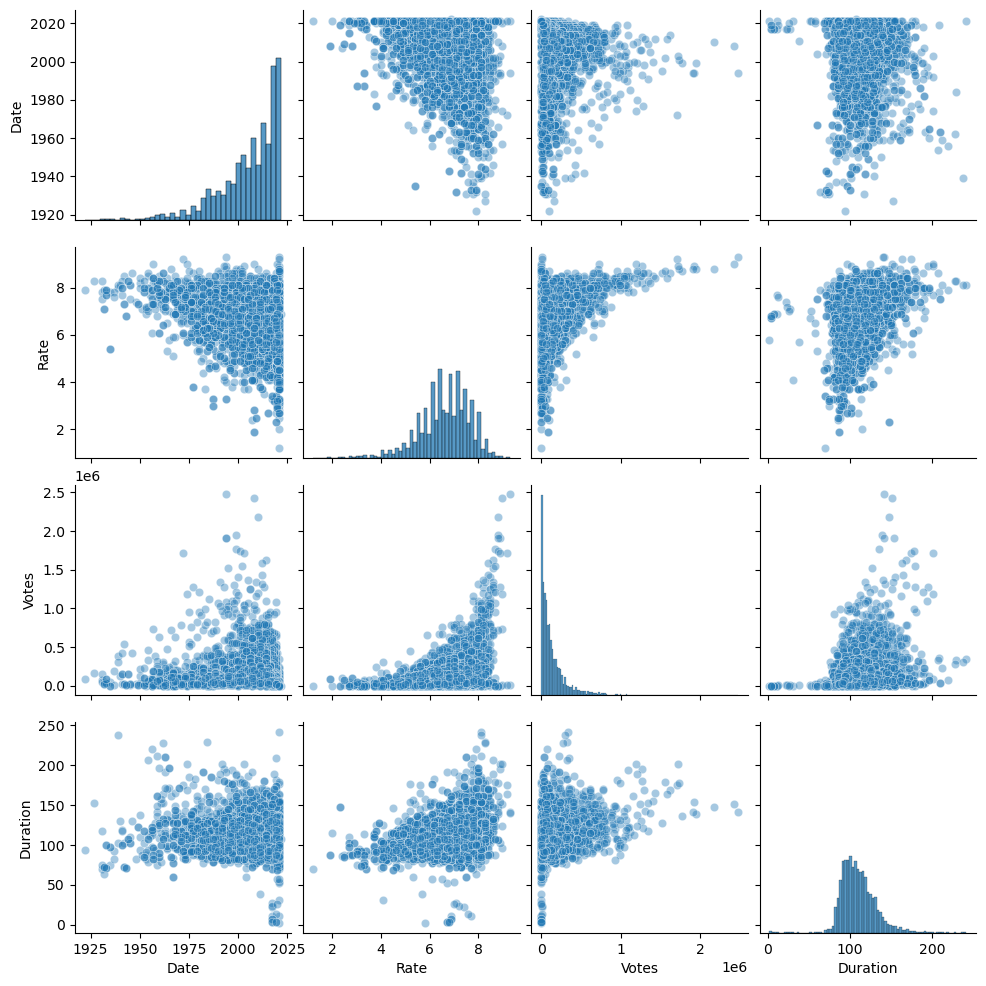

In [13]:
sns.pairplot(df,kind='scatter' , plot_kws={'alpha' : 0.4})


<Axes: >

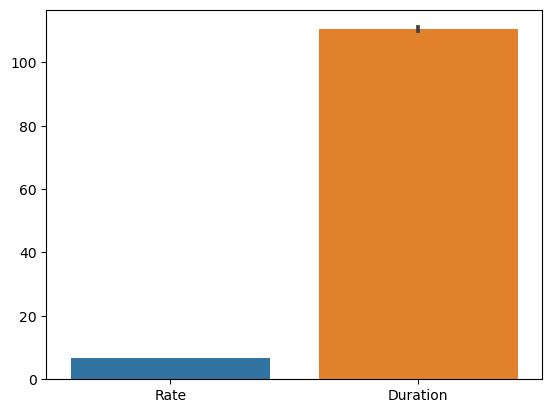

In [14]:
sns.barplot(df[["Rate","Duration"]])

In [15]:
import random

def replace_unknown(x):
    unknown_values = x[x == 'Unknown']
    num_unknown = unknown_values.shape[0]
    if num_unknown > 0:
        replacement_values = [random.choice(['No Rate','Mild','Moderate','Severe']) for _ in range(num_unknown)]
        x.loc[x == 'Unknown'] = replacement_values
    return x

# Randomly replace 'Unknown' values in each column
df['Violence'] = replace_unknown(df['Violence'])
df['Profanity'] = replace_unknown(df['Profanity'])
df['Alcohol'] = replace_unknown(df['Alcohol'])
df['Frightening'] = replace_unknown(df['Frightening'])
print(df.head())
print(df.sample(1))
print(df.info())

print(df.isnull().sum())


                          Name  Date  Rate   Votes  \
0               No Time to Die  2021   7.6  107163   
1                   The Guilty  2021   6.3   64375   
2    The Many Saints of Newark  2021   6.4   27145   
3  Venom: Let There Be Carnage  2021   6.4   30443   
4                         Dune  2021   8.3   84636   

                         Genre  Duration  Type Certificate  Violence  \
0  Action, Adventure, Thriller     163.0  Film       PG-13  Moderate   
1       Crime, Drama, Thriller      90.0  Film           R   No Rate   
2                 Crime, Drama     120.0  Film           R    Severe   
3    Action, Adventure, Sci-Fi      97.0  Film       PG-13  Moderate   
4     Action, Adventure, Drama     155.0  Film       PG-13  Moderate   

  Profanity   Alcohol Frightening  
0      Mild      Mild    Moderate  
1    Severe   No Rate    Moderate  
2    Severe  Moderate    Moderate  
3  Moderate      Mild    Moderate  
4   No Rate      Mild    Moderate  
           Name  Date  Rat

C:\Users\Abdul\AppData\Local\Temp\ipykernel_19524\231123910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[x == 'Unknown'] = replacement_values
C:\Users\Abdul\AppData\Local\Temp\ipykernel_19524\231123910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[x == 'Unknown'] = replacement_values
C:\Users\Abdul\AppData\Local\Temp\ipykernel_19524\231123910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[x == 'Unkno

In [16]:
print(df.duplicated().sum())
print(df.duplicated(subset=['Name', 'Date']).sum())
duplicate_mask = df.duplicated()
duplicate_rows = df[duplicate_mask]

print(duplicate_rows.head())



582
836
                               Name  Date  Rate   Votes  \
5029                   Dante's Peak  1997   6.0   86689   
5031               Strange But True  2019   5.9    4151   
5033  I Spit on Your Grave: Deja Vu  2019   2.3    2463   
5035                   Smokin' Aces  2006   6.7  141825   
5037                Treasure Planet  2002   7.2  110023   

                             Genre  Duration  Type Certificate  Violence  \
5029   Action, Adventure, Thriller     108.0  Film       PG-13  Moderate   
5031                      Thriller      96.0  Film       PG-13      Mild   
5033              Horror, Thriller     148.0  Film   Not Rated    Severe   
5035         Action, Comedy, Crime     109.0  Film           R    Severe   
5037  Animation, Adventure, Family      95.0  Film          PG      Mild   

     Profanity   Alcohol Frightening  
5029      Mild      Mild    Moderate  
5031  Moderate  Moderate    Moderate  
5033    Severe      Mild    Moderate  
5035    Severe    Severe

In [17]:
print(df['Name'].nunique())
duplicated_rows = df[df.duplicated(subset=['Name','Date'], keep=False)]
print(duplicated_rows)

print(df.count())


3368
                                        Name  Date  Rate   Votes  \
3878                   Smokey and the Bandit  1977   7.0   48070   
3879                            Dante's Peak  1997   6.0   86689   
3881                        Strange But True  2019   5.9    4151   
3882                                 Yes Day  2021   5.7   20492   
3883           I Spit on Your Grave: Deja Vu  2019   2.3    2463   
...                                      ...   ...   ...     ...   
6173  The Human Centipede II (Full Sequence)  2011   3.8   37492   
6174                        Double Indemnity  1944   8.3  150448   
6175      Before the Devil Knows You're Dead  2007   7.3  100668   
6176                              Queen Bees  2021   6.0     887   
6177                              Death Race  2008   6.3  203578   

                            Genre  Duration  Type Certificate  Violence  \
3878    Action, Adventure, Comedy      96.0  Film          PG      Mild   
3879  Action, Adventure, Thr

In [18]:
# Remove duplicates based on 'Name' and 'Date', keeping the first occurrence
df_unique = df.drop_duplicates(subset=['Name', 'Date'], keep='first')

# Print the number of unique names after removing duplicates
print(df_unique['Name'].nunique())
print(df.count())
print(df.dtypes)
print(df.describe())

3368
Name           4301
Date           4301
Rate           4301
Votes          4301
Genre          4301
Duration       4301
Type           4301
Certificate    4301
Violence       4301
Profanity      4301
Alcohol        4301
Frightening    4301
dtype: int64
Name            object
Date             int64
Rate           float64
Votes            int32
Genre           object
Duration       float64
Type            object
Certificate     object
Violence        object
Profanity       object
Alcohol         object
Frightening     object
dtype: object
              Date         Rate         Votes     Duration
count  4301.000000  4301.000000  4.301000e+03  4301.000000
mean   2005.042548     6.625366  1.530404e+05   110.454778
std      15.906743     1.034950  2.106839e+05    21.110079
min    1922.000000     1.200000  5.200000e+01     2.000000
25%    1997.000000     6.100000  3.153600e+04    96.000000
50%    2009.000000     6.700000  8.623400e+04   108.000000
75%    2018.000000     7.300000  1.8906

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


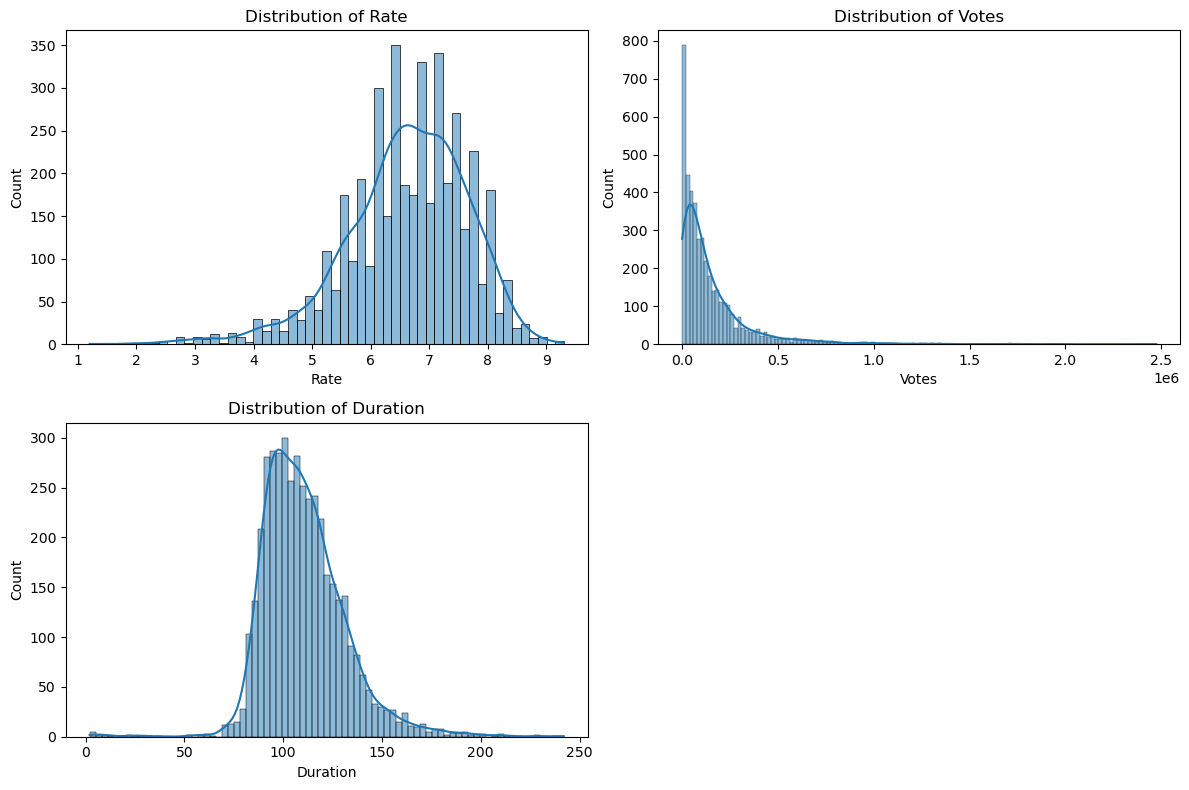

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Rate'], kde=True)
plt.title('Distribution of Rate')

plt.subplot(2, 2, 2)
sns.histplot(df['Votes'], kde=True)
plt.title('Distribution of Votes')

plt.subplot(2, 2, 3)
sns.histplot(df['Duration'], kde=True)
plt.title('Distribution of Duration')



plt.tight_layout()
plt.show()





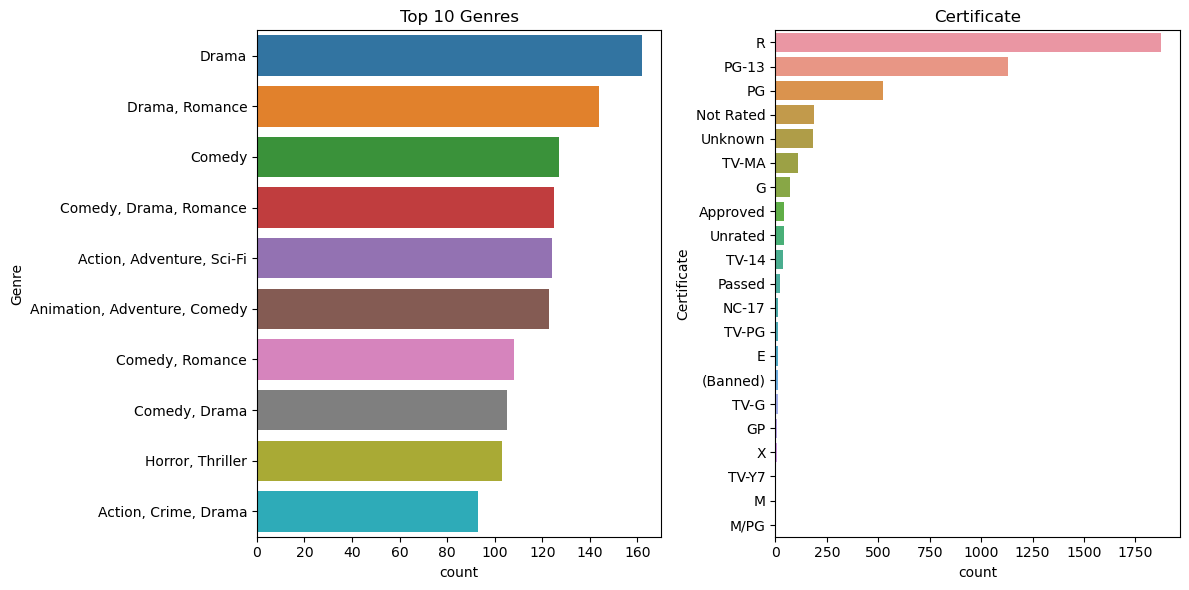

In [20]:
# Bar plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index[:10])
plt.title('Top 10 Genres')

plt.subplot(1, 2, 2)
sns.countplot(y='Certificate', data=df, order=df['Certificate'].value_counts().index)
plt.title('Certificate')


plt.tight_layout()
plt.show()


C:\Users\Abdul\AppData\Local\Temp\ipykernel_19524\633315087.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rate', y='Name', data=top_10_movies, palette='viridis', ci=None)


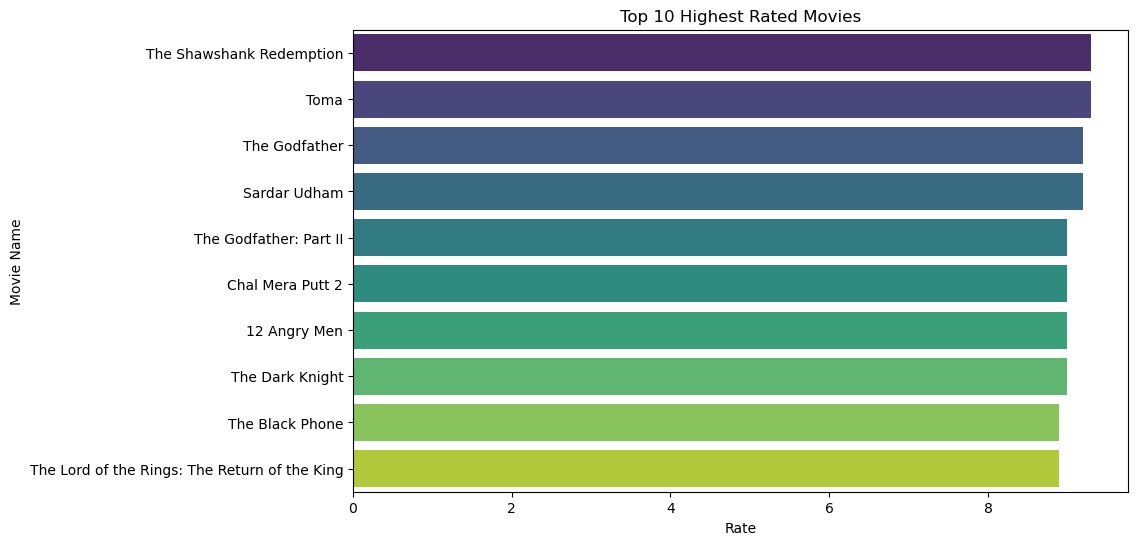

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'Rate' in descending order
df_sorted = df.sort_values(by='Rate', ascending=False)

# Select the top 10 movies
top_10_movies = df_sorted.head(10)

# Plot the horizontal bar chart with continuous color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Rate', y='Name', data=top_10_movies, palette='viridis', ci=None)
plt.xlabel('Rate')
plt.ylabel('Movie Name')
plt.title('Top 10 Highest Rated Movies')
plt.show()


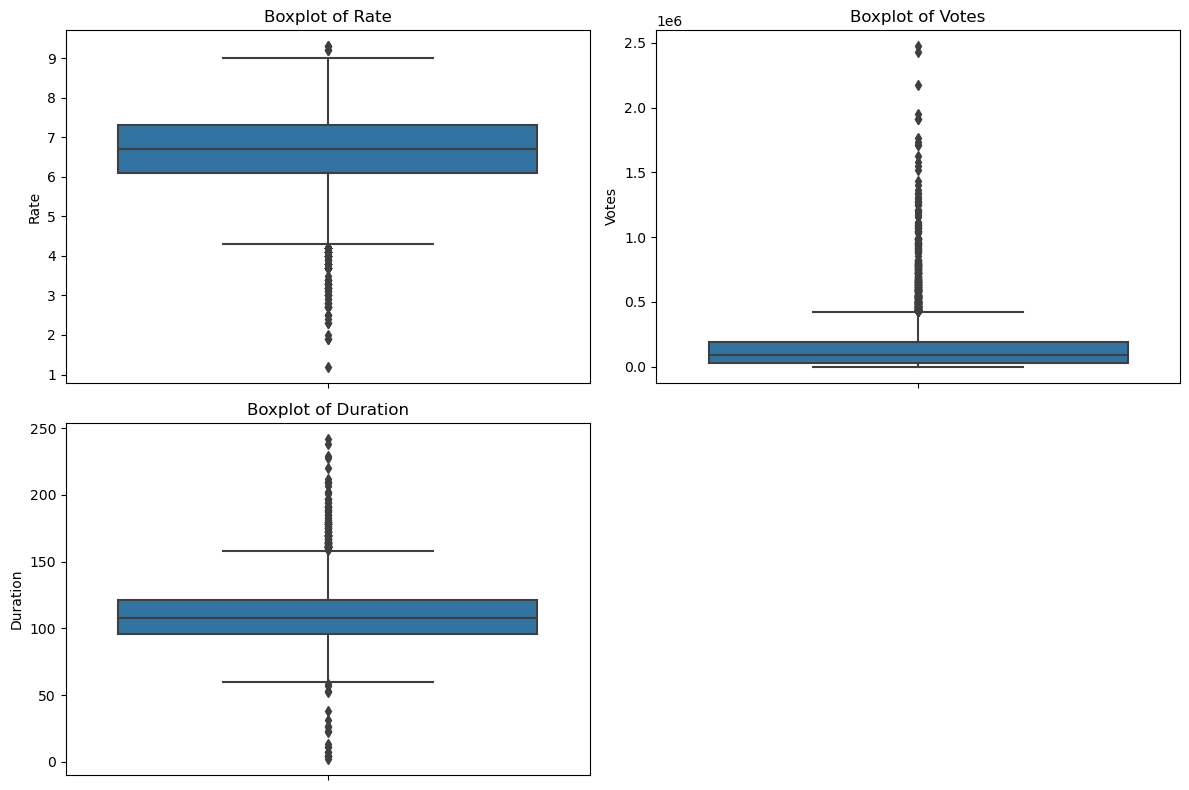

In [22]:
# Box plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(y='Rate', data=df)
plt.title('Boxplot of Rate')

plt.subplot(2, 2, 2)
sns.boxplot(y='Votes', data=df)
plt.title('Boxplot of Votes')

plt.subplot(2, 2, 3)
sns.boxplot(y='Duration', data=df)
plt.title('Boxplot of Duration')



plt.tight_layout()
plt.show()


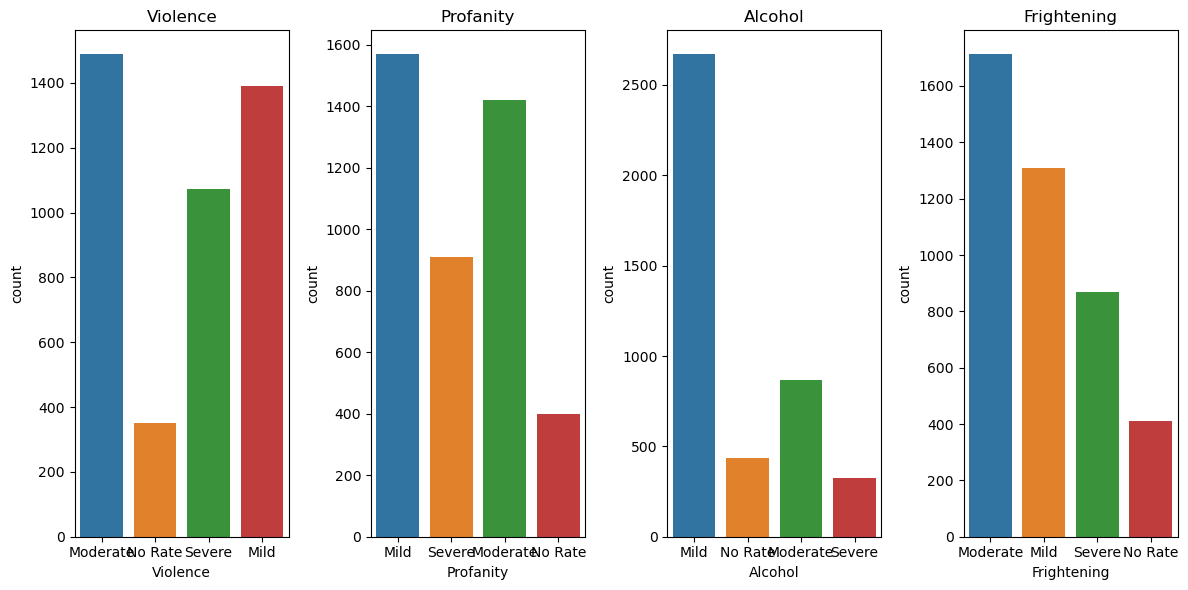

In [23]:
# Count plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
sns.countplot(x='Violence', data=df)
plt.title('Violence')

plt.subplot(1, 4, 2)
sns.countplot(x='Profanity', data=df)
plt.title('Profanity')

plt.subplot(1, 4, 3)
sns.countplot(x='Alcohol', data=df)
plt.title('Alcohol')

plt.subplot(1, 4, 4)
sns.countplot(x='Frightening', data=df)
plt.title('Frightening')

plt.tight_layout()
plt.show()


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 0 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4301 non-null   object 
 1   Date         4301 non-null   int64  
 2   Rate         4301 non-null   float64
 3   Votes        4301 non-null   int32  
 4   Genre        4301 non-null   object 
 5   Duration     4301 non-null   float64
 6   Type         4301 non-null   object 
 7   Certificate  4301 non-null   object 
 8   Violence     4301 non-null   object 
 9   Profanity    4301 non-null   object 
 10  Alcohol      4301 non-null   object 
 11  Frightening  4301 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 420.0+ KB
None


In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named df

# Step 1: Removing outliers
# Define a function to remove outliers using IQR method
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]
def remove_outliersVotes(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.2 * IQR
    upper_bound = Q3 + 1.2 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]


# Apply the function to remove outliers
df['Votes'] = remove_outliersVotes(df['Votes'])

df['Duration'] = remove_outliers(df['Duration'])

# Step 2: Normalizing the 'Rate' column
scaler = MinMaxScaler(feature_range=(0, 10))  # Scale between 0 and 10
df['Rate'] = scaler.fit_transform(df['Rate'].values.reshape(-1, 1))

# Checking the cleaned and normalized DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 0 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4301 non-null   object 
 1   Date         4301 non-null   int64  
 2   Rate         4301 non-null   float64
 3   Votes        3893 non-null   float64
 4   Genre        4301 non-null   object 
 5   Duration     4168 non-null   float64
 6   Type         4301 non-null   object 
 7   Certificate  4301 non-null   object 
 8   Violence     4301 non-null   object 
 9   Profanity    4301 non-null   object 
 10  Alcohol      4301 non-null   object 
 11  Frightening  4301 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 436.8+ KB
None


# AFter Doing Searches I came up with the Next conclusion The outliers here some not error It's more than a genuine outlier So I will keep that small outliers that show more Interestening results



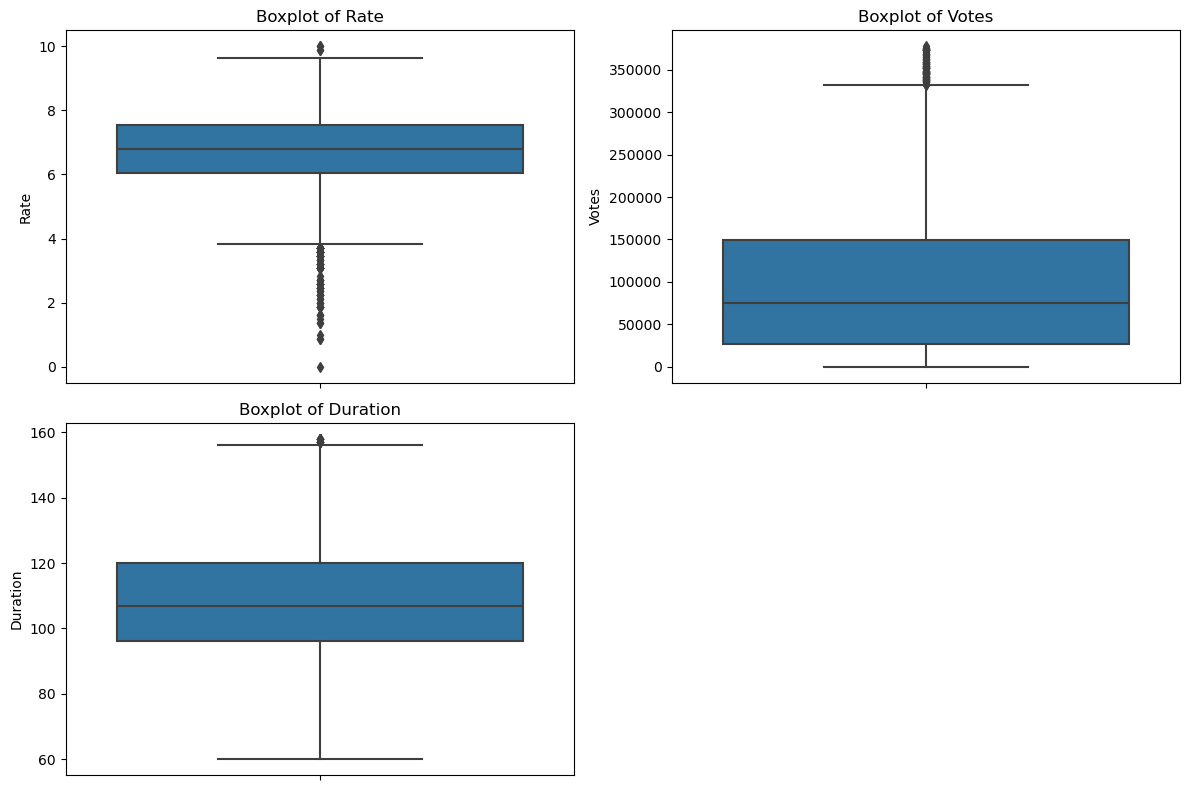

In [26]:
# Box plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(y='Rate', data=df)
plt.title('Boxplot of Rate')

plt.subplot(2, 2, 2)
sns.boxplot(y='Votes', data=df)
plt.title('Boxplot of Votes')

plt.subplot(2, 2, 3)
sns.boxplot(y='Duration', data=df)
plt.title('Boxplot of Duration')



plt.tight_layout()
plt.show()


In [27]:
print(df.describe())
print(df.info())
print(df.shape)



              Date         Rate          Votes     Duration
count  4301.000000  4301.000000    3893.000000  4168.000000
mean   2005.042548     6.697983   99808.746468   109.050144
std      15.906743     1.277716   90004.894264    16.964357
min    1922.000000     0.000000      52.000000    60.000000
25%    1997.000000     6.049383   26953.000000    96.000000
50%    2009.000000     6.790123   74761.000000   107.000000
75%    2018.000000     7.530864  148948.000000   120.000000
max    2022.000000    10.000000  377673.000000   158.000000
<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 0 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4301 non-null   object 
 1   Date         4301 non-null   int64  
 2   Rate         4301 non-null   float64
 3   Votes        3893 non-null   float64
 4   Genre        4301 non-null   object 
 5   Duration     4168 non-null   float64
 6   Type         4301

In [28]:
print(df.isna().sum())
df = df.dropna()
print(df.isna().sum())


Name             0
Date             0
Rate             0
Votes          408
Genre            0
Duration       133
Type             0
Certificate      0
Violence         0
Profanity        0
Alcohol          0
Frightening      0
dtype: int64
Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Type           0
Certificate    0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64


F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


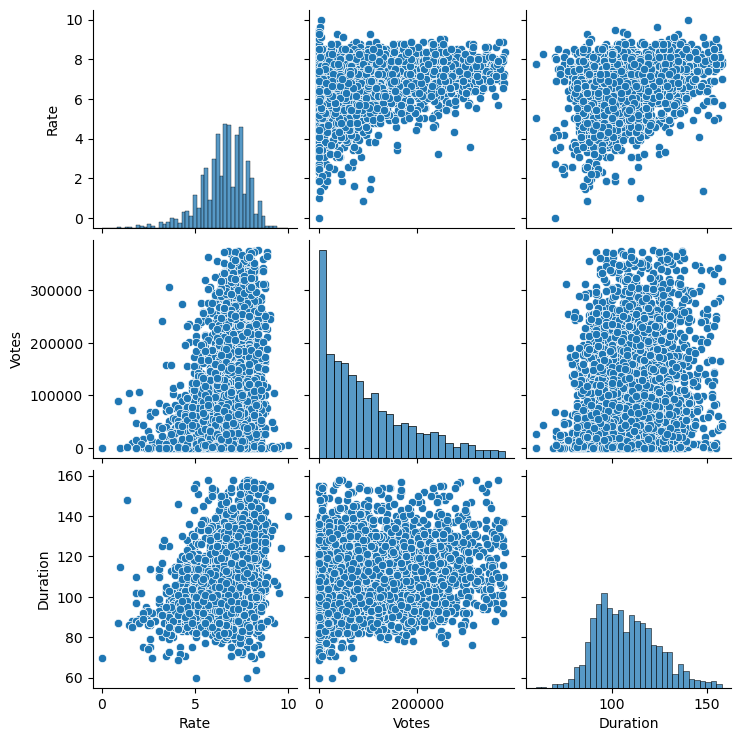

In [29]:
# Pairplot for numerical variables
sns.pairplot(df[['Rate', 'Votes', 'Duration']].dropna(),kind ="scatter")
plt.show()


In [30]:

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numericalColumns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

print(df[numericalColumns].corr())


NameError: name 'numericalColumns' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
print(df.sample(10))

In [ ]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(data=df.drop(columns=["Date","Rate","Duration"]))


In [ ]:

fig = plt.figure(figsize=(12,6))

sns.boxplot(data=df.drop(columns=["Votes"]))


In [ ]:
import seaborn as sns
sns.jointplot(x="Rate" , y="Frightening" ,data=df)
sns.jointplot(x="Rate" , y="Votes" ,data=df)
sns.jointplot(x="Rate" , y="Date" ,data=df_normalized)
sns.jointplot(x="Rate" , y="Duration" ,data=df_normalized)
sns.jointplot(x="Rate" , y="Profanity" ,data=df_normalized)

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

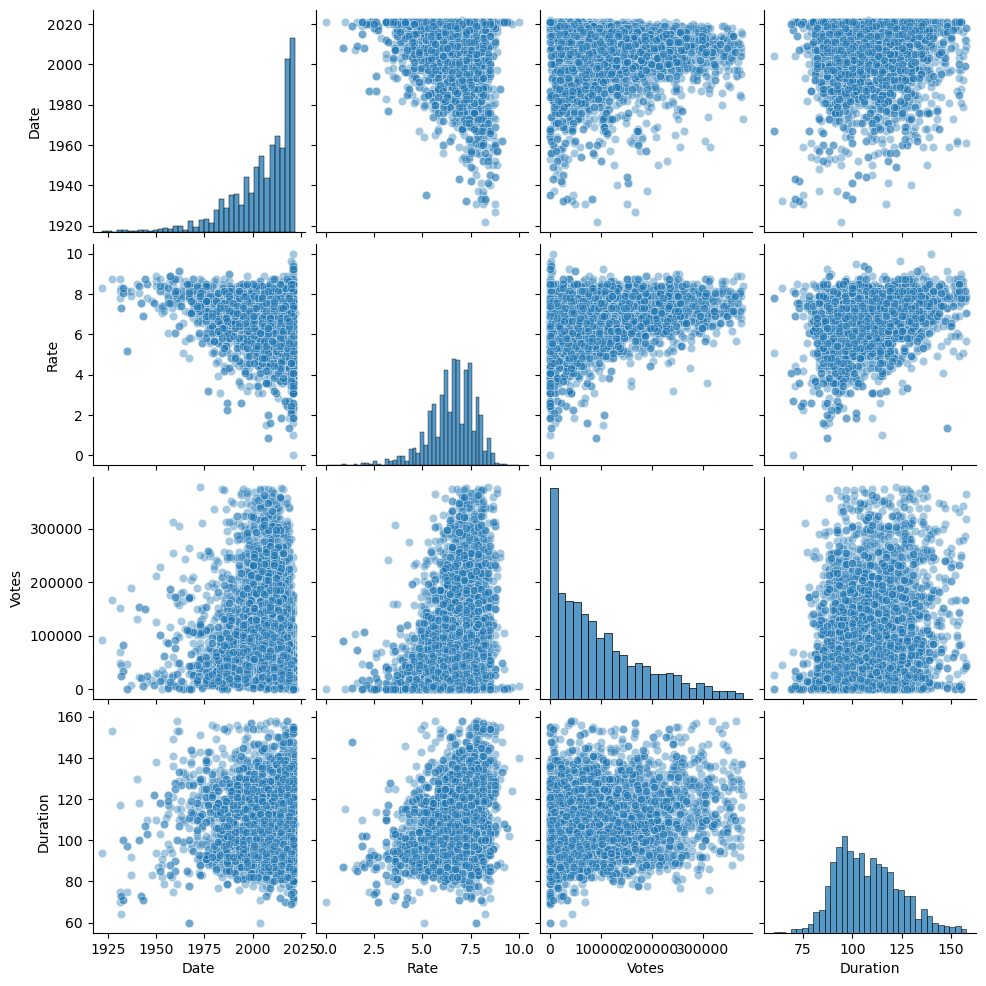

In [31]:
sns.pairplot(df,kind='scatter' , plot_kws={'alpha' : 0.4})

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3793 entries, 1 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         3793 non-null   object 
 1   Date         3793 non-null   int64  
 2   Rate         3793 non-null   float64
 3   Votes        3793 non-null   float64
 4   Genre        3793 non-null   object 
 5   Duration     3793 non-null   float64
 6   Type         3793 non-null   object 
 7   Certificate  3793 non-null   object 
 8   Violence     3793 non-null   object 
 9   Profanity    3793 non-null   object 
 10  Alcohol      3793 non-null   object 
 11  Frightening  3793 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 385.2+ KB
None


C:\Users\Abdul\AppData\Local\Temp\ipykernel_19524\3738479464.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


##############Movies in Cluster 0 ################
Run Hide Fight With Rate 7.28
Tangerine With Rate 8.02
The Courier With Rate 8.15
Belfast With Rate 7.16
On the Basis of Sex With Rate 6.42
The Croods: A New Age With Rate 7.16
The Awakening With Rate 7.28
Tombstone With Rate 6.54
While You Were Sleeping With Rate 6.79
Enough Said With Rate 7.28
##############Movies in Cluster 1 ################
The Little Hours With Rate 6.3
Push With Rate 2.59
Exposed With Rate 6.05
The Emoji Movie With Rate 3.83
Le dernier mercenaire With Rate 6.05
Scouts Guide to the Zombie Apocalypse With Rate 6.17
Broken Arrow With Rate 5.68
Queen Bees With Rate 5.19
Red Dawn With Rate 5.06
O Menino que Matou Meus Pais With Rate 5.93
##############Movies in Cluster 2 ################
Mad Max With Rate 8.02
Battleship With Rate 7.9
The Mummy Returns With Rate 8.15
Tonari no Totoro With Rate 7.04
Stardust With Rate 6.42
Apocalypto With Rate 5.68
Eastern Promises With Rate 6.05
Goldfinger With Rate 6.42
The Punisher

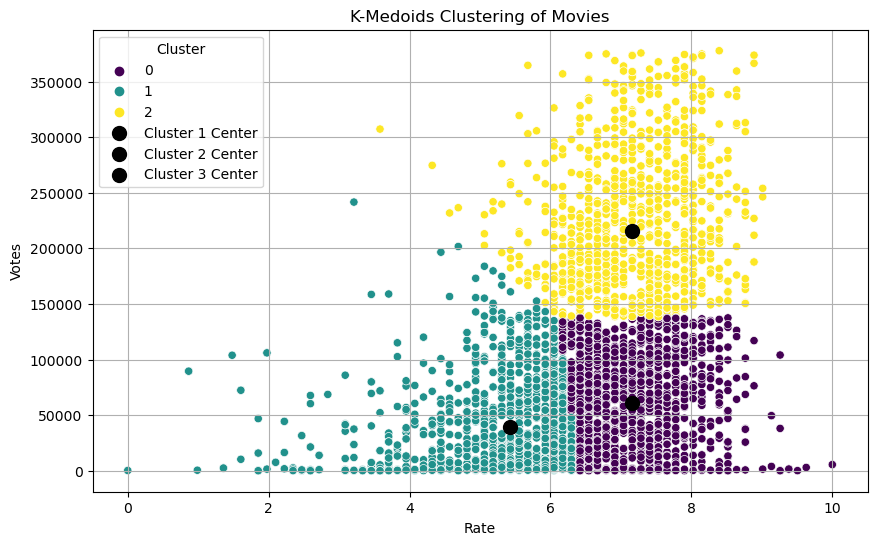

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

def preprocess_data(df, features):
    # Select the features
    X = df[features].values
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def kmedoids_clustering(X_scaled, n_clusters=3):
    # Initialize and fit the KMedoids model
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    kmedoids.fit(X_scaled)
    # Get cluster centers and labels
    cluster_centers_indices = kmedoids.medoid_indices_
    clusters = kmedoids.labels_
    return cluster_centers_indices, clusters

def visualize_clusters(df, x, y, hue, cluster_centers_indices, n_clusters):
    # Plot the data using seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='viridis')
    
    # Plot cluster centers as large red points
    for i, center_idx in enumerate(cluster_centers_indices):
        plt.scatter(df.iloc[center_idx][x], df.iloc[center_idx][y], color='Black', s=100, label=f'Cluster {i + 1} Center')
        
    # Set plot title and labels
    plt.title('K-Medoids Clustering of Movies')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.legend(title='Cluster')
    plt.show()


# Define the features to use for clustering
features = ['Rate', 'Votes']

# Preprocess the data
X_scaled = preprocess_data(df, features)

# Perform K-Medoids clustering
cluster_centers_indices, clusters = kmedoids_clustering(X_scaled, n_clusters=3)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Filter the DataFrame to see movies belonging to the first cluster
for x in range(3):
    cluster_x_movies = df[df['Cluster'] == x]
    sampled_movies = cluster_x_movies["Name"].sample(10).values
    sampled_rates = cluster_x_movies[cluster_x_movies["Name"].isin(sampled_movies)]["Rate"].values.round(2)
    print("##############Movies in Cluster",x ,"################")
    for movie, rate in zip(sampled_movies, sampled_rates):
        print(movie, "With Rate", rate)

print(cluster_centers_indices)
# Visualize the clusters
visualize_clusters(df, x='Rate', y='Votes', hue='Cluster', cluster_centers_indices=cluster_centers_indices, n_clusters=3)


F:\anaconda\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
C:\Users\Abdul\AppData\Local\Temp\ipykernel_19524\418271267.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


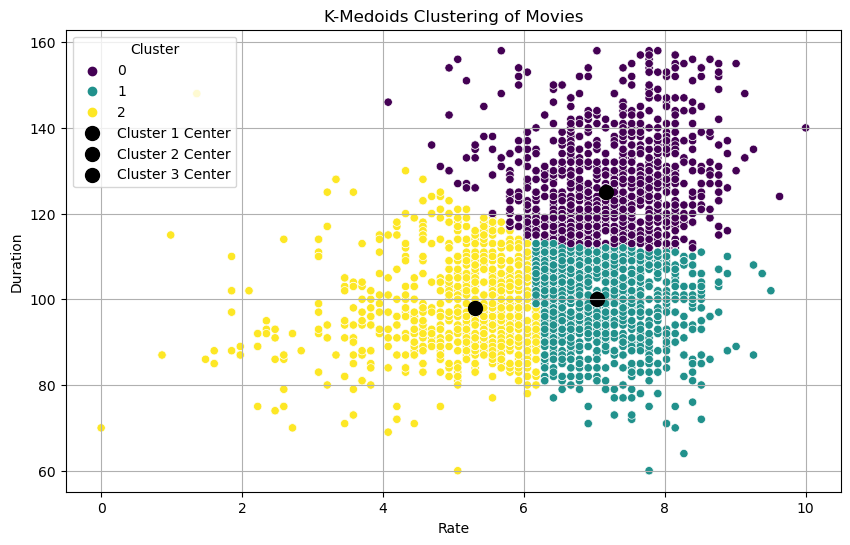

In [34]:
# Define the features to use for clustering
features2 = ['Rate', 'Duration']

# Preprocess the data
X_scaled2 = preprocess_data(df, features2)

# Perform K-Medoids clustering
cluster_centers_indices, clusters = kmedoids_clustering(X_scaled2, n_clusters=3)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Visualize the clusters
visualize_clusters(df, x='Rate', y='Duration', hue='Cluster', cluster_centers_indices=cluster_centers_indices, n_clusters=3)


In [35]:
features3 = ['Rate', 'Duration','Votes']


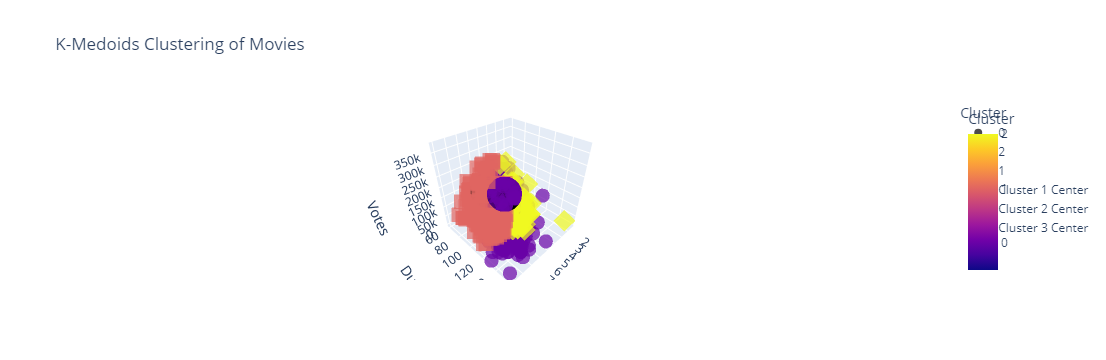

In [36]:
import plotly.express as px

# Sample the data for visualization (optional)
sampled_df = df.sample(min(1000, len(df)))

# Create the 3D scatter plot
fig = px.scatter_3d(sampled_df, x='Rate', y='Duration', z='Votes', color='Cluster', symbol='Cluster',
                    opacity=0.7, title='K-Medoids Clustering of Movies',
                    labels={'Rate': 'Rate', 'Duration': 'Duration', 'Votes': 'Votes', 'Cluster': 'Cluster'})

# Add cluster centers as markers
for i, center_idx in enumerate(cluster_centers_indices):
    cluster_center = df.iloc[center_idx]
    fig.add_scatter3d(x=[cluster_center['Rate']], y=[cluster_center['Duration']], z=[cluster_center['Votes']],
                      mode='markers', marker=dict(size=20, color='White'), name=f'Cluster {i + 1} Center',
                      showlegend=True)  # Ensure legend is shown for cluster centers

# Show the plot
fig.show()



In [39]:
print(df.describe())

              Date         Rate          Votes     Duration      Cluster
count  3793.000000  3793.000000    3793.000000  3793.000000  3793.000000
mean   2005.347746     6.526870   99187.195360   107.852623     0.971263
std      15.929585     1.227616   89066.973938    16.401980     0.791214
min    1922.000000     0.000000      52.000000    60.000000     0.000000
25%    1997.000000     5.802469   27185.000000    95.000000     0.000000
50%    2010.000000     6.666667   74676.000000   106.000000     1.000000
75%    2018.000000     7.407407  147829.000000   118.000000     2.000000
max    2022.000000    10.000000  377673.000000   158.000000     2.000000


In [68]:
# Map string labels to numerical values
violence_mapping = {"No Rate": 0, "Mild": 1, "Moderate": 2, "Severe": 3}

# Convert string labels to numerical values
violence_numeric = [violence_mapping[label] for label in df["Violence"]]

print(violence_numeric.count(4))

0


F:\anaconda\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


None
None
None


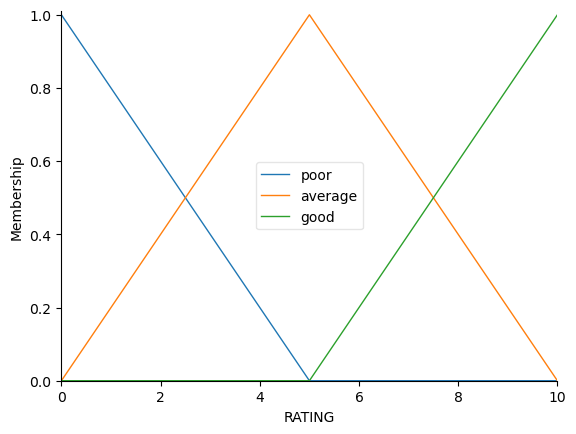

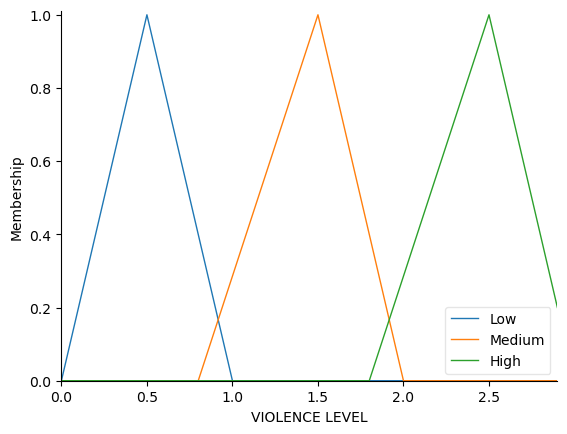

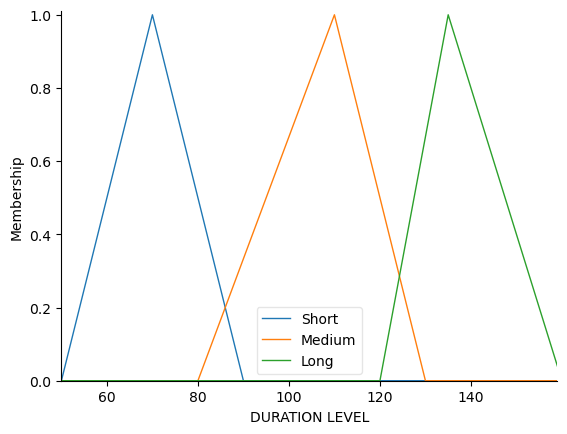

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define linguistic terms for Rate
rateOUT = ctrl.Consequent(np.arange(0, 11, 1),"RATING")
violenceInp = ctrl.Antecedent(np.arange(0, 3, 0.1),"VIOLENCE LEVEL")
durationInp = ctrl.Antecedent(np.arange(50,160,1),"DURATION LEVEL")

rateOUT.automf(3)

# # Define membership functions for Rate
# rateOUT["Low"] = fuzz.trimf(rateOUT.universe, [0, 2, 4])
# rateOUT["Medium"]= fuzz.trimf(rateOUT.universe, [3, 5, 7])
# rateOUT["High"] = fuzz.trimf(rateOUT.universe, [6, 8, 10])

# Define membership functions for Violence Level
violenceInp["Low"] = fuzz.trimf(violenceInp.universe, [0, 0.5, 1])  # Triangular membership function for "Mild" violence
violenceInp["Medium"] = fuzz.trimf(violenceInp.universe, [0.8, 1.5, 2])  # Triangular membership function for "Moderate" violence
violenceInp["High"] = fuzz.trimf(violenceInp.universe, [1.8, 2.5, 3])  # Triangular membership function for "Severe" violence

# Define membership functions for Duration Level
durationInp["Short"] = fuzz.trimf(durationInp.universe, [50, 70, 90])  # Triangular membership function for "Short" duration
durationInp["Medium"] = fuzz.trimf(durationInp.universe, [80, 110, 130])  # Triangular membership function for "Medium" duration
durationInp["Long"] = fuzz.trimf(durationInp.universe, [120, 135, 160])  # Triangular membership function for "Long" duration

print(rateOUT.view())
print(violenceInp.view())
print(durationInp.view())


# rule1 = ctrl.Rule(violenceInp["High"] & durationInp["Long"], rateOUT["Low"])
# rule2 = ctrl.Rule(violenceInp["Low"] & durationInp["Medium"] , rateOUT["High"])
# rule3 = ctrl.Rule(violenceInp["Medium"] & durationInp["Long"] , rateOUT["Medium"])
# rule4 = ctrl.Rule(durationInp["Short"]&violenceInp["High"], rateOUT["Low"])
# rule5 = ctrl.Rule(durationInp["Short"]&violenceInp["Low"] ,rateOUT["Medium"] )
    
# Rate_System = ctrl.ControlSystem([rule1,rule2,rule3,rule4])
# Rate_Simulator = ctrl.ControlSystemSimulation(Rate_System)

# V = Rate_Simulator.input["VIOLENCE LEVEL"] = 1.9
# D = Rate_Simulator.input["DURATION LEVEL"] = 125
    
# Rate_Simulator.compute()
# RateValue = Rate_Simulator.output["RATING"]
    
# print("Since Movie has Violence Scale ", V , "And Duration ", D , "Then the Rate is ", RateValue)


In [144]:
for index, row in df.iterrows():
    if row["Duration"] < 80 and row["Violence"] == "Severe":
        print(row["Rate"])




7.6543209876543195
5.5555555555555545
7.4074074074074066
2.469135802469135
6.049382716049381
7.4074074074074066
2.469135802469135


None


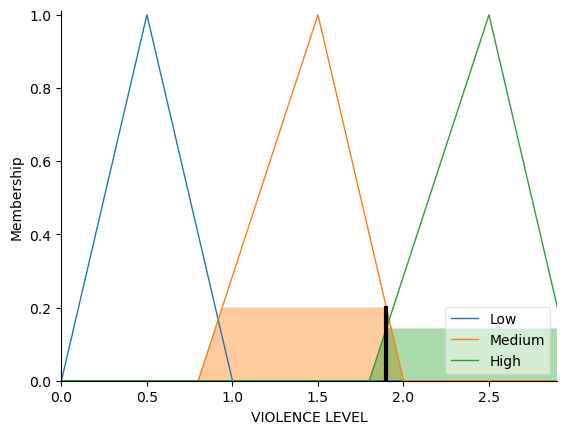

In [145]:

print(violenceInp.view(Rate_Simulator))


None


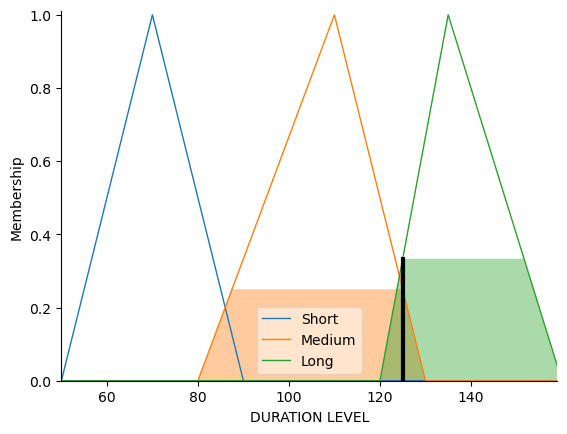

In [146]:
print(durationInp.view(Rate_Simulator))


None


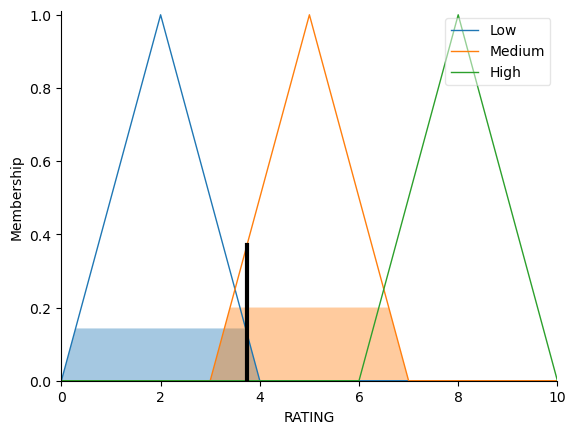

In [147]:
print(rateOUT.view(Rate_Simulator))

None


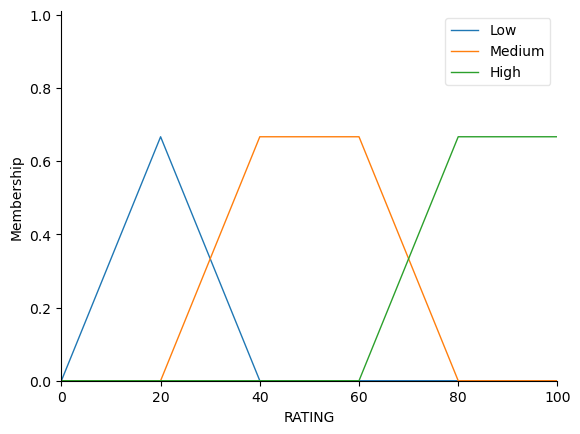